In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gala.potential as gp
from potentials import L18

/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
L18M1 = L18(LMC_model = 'LMC1')
L18M2 = L18(LMC_model = 'LMC2')
L18M3 = L18(LMC_model = 'LMC3')
L18M4 = L18(LMC_model = 'LMC4')
L18M5 = L18(LMC_model = 'LMC5')
L18M6 = L18(LMC_model = 'LMC6')

In [17]:
L18M1_mwpot = L18M1.milkyway()
L18M1_lmcpot = L18M1.lmc()
L18M2_lmcpot = L18M2.lmc()
L18M3_lmcpot = L18M3.lmc()
L18M4_lmcpot = L18M4.lmc()
L18M5_lmcpot = L18M5.lmc()
L18M6_lmcpot = L18M6.lmc()

In [18]:
q = [np.zeros(50), np.zeros(50), np.logspace(-2, 1.5, 50)]
vc_mw = L18M1_mwpot.circular_velocity(q)
vc_lmc1 = L18M1_lmcpot.circular_velocity(q)
vc_lmc2 = L18M2_lmcpot.circular_velocity(q)
vc_lmc3 = L18M3_lmcpot.circular_velocity(q)
vc_lmc4 = L18M4_lmcpot.circular_velocity(q)
vc_lmc5 = L18M5_lmcpot.circular_velocity(q)
vc_lmc6 = L18M6_lmcpot.circular_velocity(q)


In [8]:
def load_rc_data():
    MWrc = np.loadtxt('../data/MWDR3rc.txt')
    Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference = np.genfromtxt('../data/LMCrc.txt', 
                                                                   usecols=[0, 4, 5, 6, 7], 
                                                                   unpack=True, delimiter=',',
                                                                   dtype=['f4', 'f4', 'f4', 'f4', 'S22'])
    return MWrc, Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference
    
MWrc, Rlmc, vcLMC, vcLMC_errl, vcLMC_errh, reference = load_rc_data()

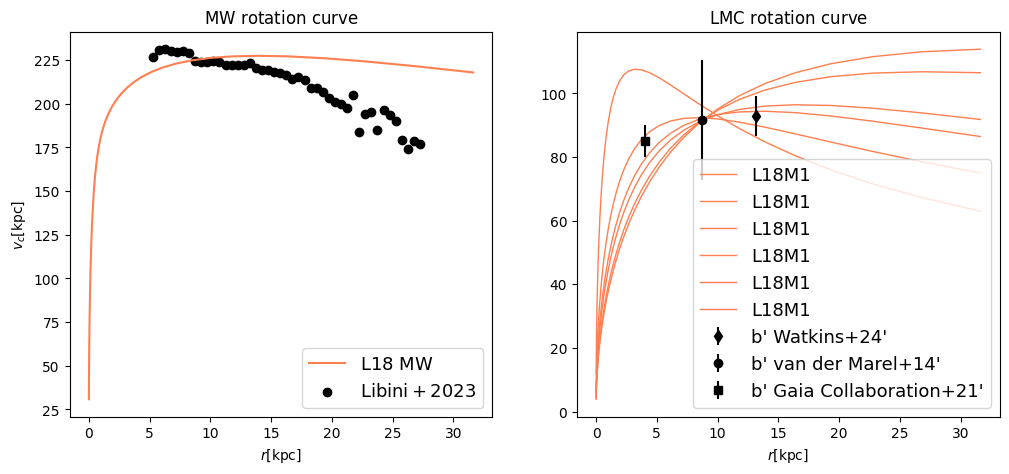

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(q[2], vc_mw, c='coral', label=r'$\rm{L18\ MW}$')
ax[1].plot(q[2], vc_lmc1, c='coral', lw=1, label='L18M1')
ax[1].plot(q[2], vc_lmc2, c='coral', lw=1, label='L18M1')
ax[1].plot(q[2], vc_lmc3, c='coral', lw=1, label='L18M1')
ax[1].plot(q[2], vc_lmc4, c='coral', lw=1, label='L18M1')
ax[1].plot(q[2], vc_lmc5, c='coral', lw=1, label='L18M1')
ax[1].plot(q[2], vc_lmc6, c='coral', lw=1, label='L18M1')


ax[0].set_xlabel(r'$r\rm{[kpc]}$')
ax[1].set_xlabel(r'$r\rm{[kpc]}$')
ax[0].set_ylabel(r'$v_c \rm{[kpc]}$')
ax[0].set_title(r'$\rm{MW\ rotation\ curve}$')
ax[1].set_title(r'$\rm{LMC\ rotation\ curve}$')
ax[0].scatter(MWrc[:,0], MWrc[:,1], c='k', label=r'$\rm{Libini+2023}$')
markers = ['d', 'o', 's']
for i in range(len(Rlmc)):
    ax[1].errorbar(Rlmc[i], vcLMC[i], yerr=vcLMC_errl[i], fmt=markers[i], label=reference[i], c='k')

ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
#plt.savefig('../figures/GC21_model.pdf', bbox_inches='tight')
plt.show()